<a href="https://colab.research.google.com/github/abhirockraj1/CrashAnalysis/blob/main/CrashAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install  opendatasets

In [5]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib

In [7]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/himelsarder/road-accident-survival-dataset/data'
# Using opendatasets let's download the data sets
od.download(dataset )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajabhi1
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/himelsarder/road-accident-survival-dataset


100%|██████████| 1.19k/1.19k [00:00<00:00, 2.19MB/s]

In [10]:
data = pd.read_csv("/content/road-accident-survival-dataset/accident.csv")
data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [11]:
data.isnull().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [13]:
data.dropna(inplace=True)
data.isnull().sum()

,0
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [14]:
data.describe()

,Age,Speed_of_Impact,Survived
count,196.000000,196.000000,196.000000
mean,43.341837,70.433673,0.510204
std,15.004973,30.202236,0.501176
min,18.000000,20.000000,0.000000
25%,31.000000,43.000000,0.000000
50%,44.000000,71.000000,1.000000
75%,56.000000,95.500000,1.000000
max,69.000000,119.000000,1.000000


In [19]:
categorical_cols = ['Gender', 'Helmet_Used', 'Seatbelt_Used']
numerical_cols = ['Age', 'Speed_of_Impact']

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True,dtype=int)

# Check the new columns
data_encoded.head()

,Age,Speed_of_Impact,Survived,Gender_Male,Helmet_Used_Yes,Seatbelt_Used_Yes
0,56,27.0,1,0,0,0
1,69,46.0,1,0,0,1
2,46,46.0,0,1,1,1
3,32,117.0,0,1,0,1
4,60,40.0,0,0,1,1


In [16]:
y= data['Survived']
y.head()

,Survived
0,1
1,1
2,0
3,0
4,0


In [21]:
dataN = pd.concat([data_encoded,y])
dataN.head()

,Age,Speed_of_Impact,Survived,Gender_Male,Helmet_Used_Yes,Seatbelt_Used_Yes
0,56.0,27.0,1,0.0,0.0,0.0
1,69.0,46.0,1,0.0,0.0,1.0
2,46.0,46.0,0,1.0,1.0,1.0
3,32.0,117.0,0,1.0,0.0,1.0
4,60.0,40.0,0,0.0,1.0,1.0


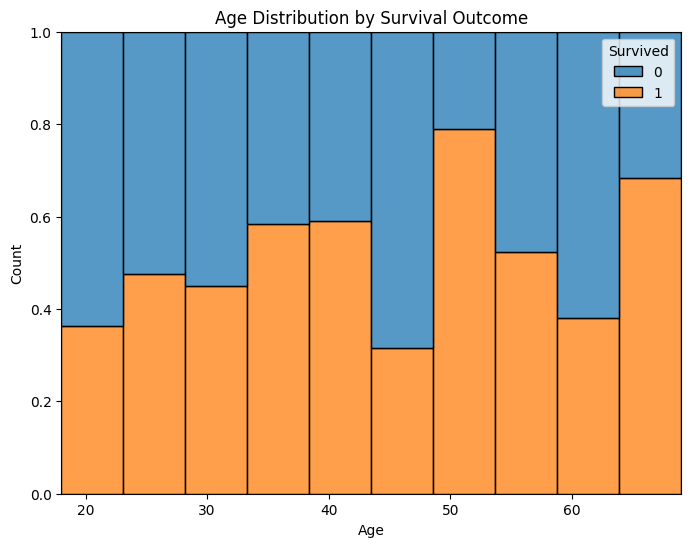

In [29]:
# Survival by age
plt.figure(figsize=(8, 6))
sns.histplot(data=dataN, x='Age', hue='Survived', multiple='fill')
plt.title('Age Distribution by Survival Outcome')
plt.show()

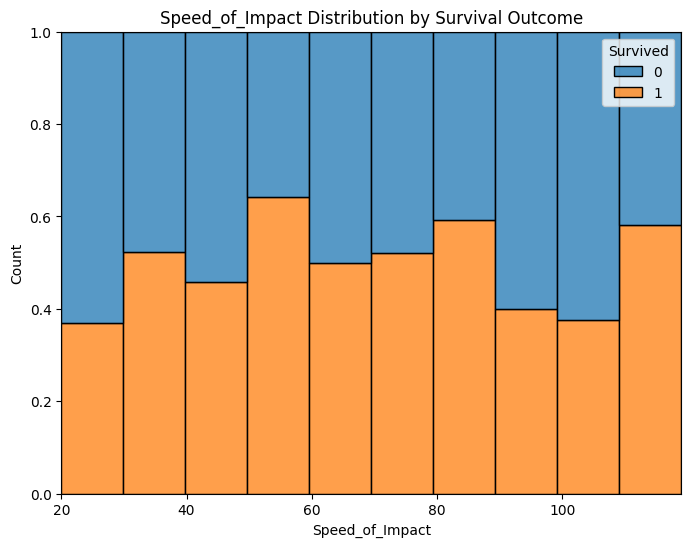

In [28]:
# Survival by age
plt.figure(figsize=(8, 6))
sns.histplot(data=dataN, x='Speed_of_Impact', hue='Survived', multiple='fill')
plt.title('Speed_of_Impact Distribution by Survival Outcome')
plt.show()

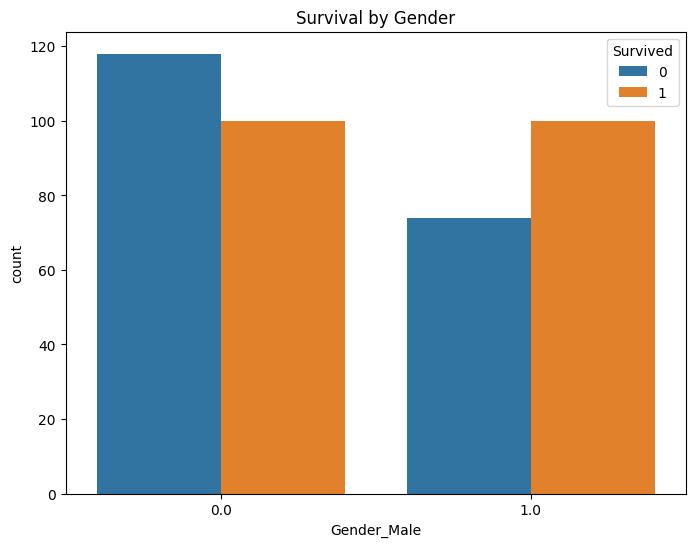

In [32]:
# Survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=dataN, x='Gender_Male', hue='Survived')
plt.title('Survival by Gender')
plt.show()

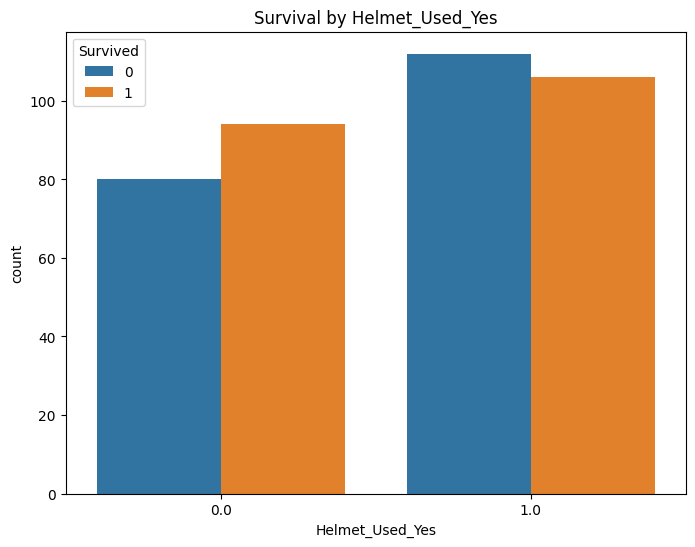

In [33]:
# Survival by Helmet_Used_Yes
plt.figure(figsize=(8, 6))
sns.countplot(data=dataN, x='Helmet_Used_Yes', hue='Survived')
plt.title('Survival by Helmet_Used_Yes')
plt.show()

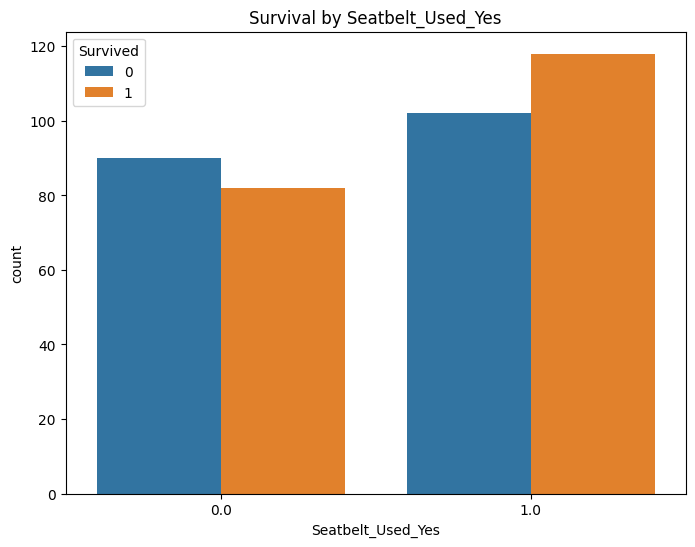

In [34]:
# Survival by Seatbelt_Used_Yes
plt.figure(figsize=(8, 6))
sns.countplot(data=dataN, x='Seatbelt_Used_Yes', hue='Survived')
plt.title('Survival by Seatbelt_Used_Yes')
plt.show()

<Figure size 800x600 with 0 Axes>

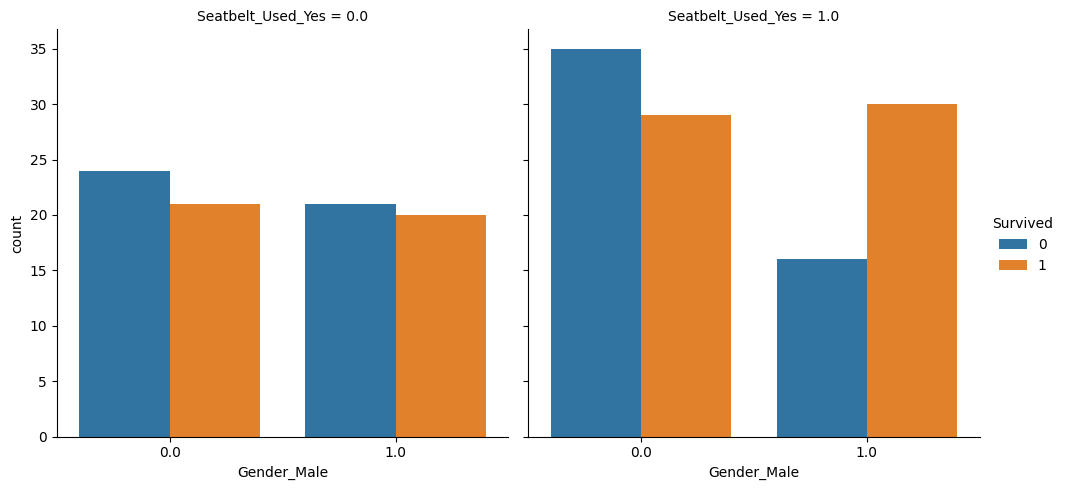

In [35]:
plt.figure(figsize=(8, 6))
sns.catplot(x='Gender_Male', hue='Survived', col='Seatbelt_Used_Yes', kind='count', data=dataN)
plt.show()

<Figure size 800x600 with 0 Axes>

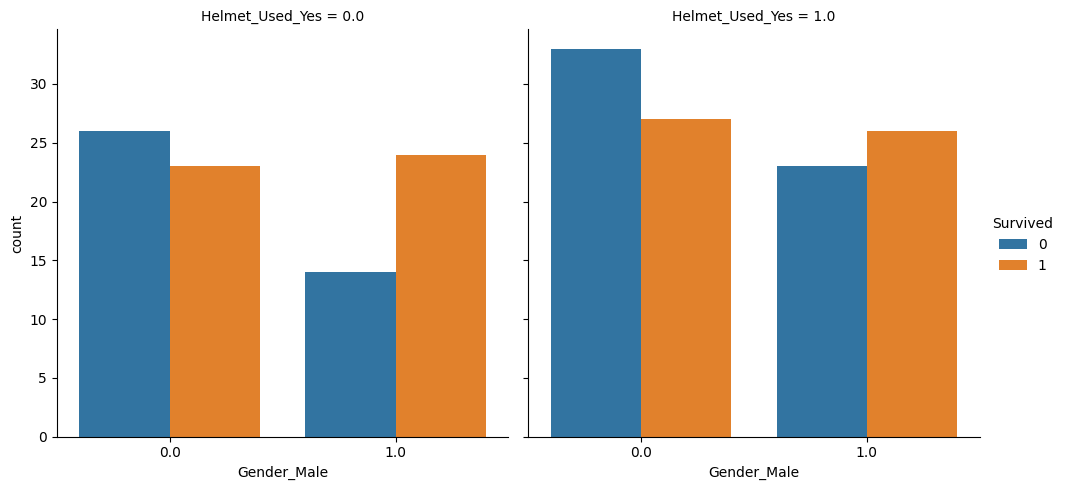

In [36]:
plt.figure(figsize=(8, 6))
sns.catplot(x='Gender_Male', hue='Survived', col='Helmet_Used_Yes', kind='count', data=dataN)
plt.show()

In [37]:
dataN.columns

Index(['Age', 'Speed_of_Impact', 'Survived', 'Gender_Male', 'Helmet_Used_Yes',
       'Seatbelt_Used_Yes'],
      dtype='object')

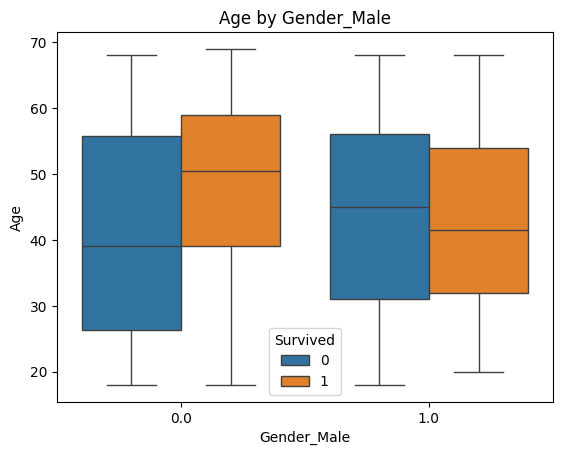

In [39]:
# Create a box plot
sns.boxplot(x='Gender_Male', y='Age', hue='Survived', data=dataN)

# Add labels and title
plt.xlabel('Gender_Male')
plt.ylabel('Age')
plt.title('Age by Gender_Male')

# Show the plot
plt.show()

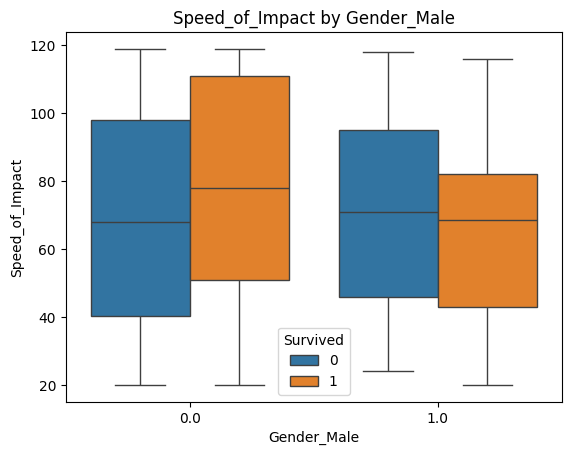

In [40]:
# Create a box plot
sns.boxplot(x='Gender_Male', y='Speed_of_Impact', hue='Survived', data=dataN)

# Add labels and title
plt.xlabel('Gender_Male')
plt.ylabel('Speed_of_Impact')
plt.title('Speed_of_Impact by Gender_Male')

# Show the plot
plt.show()